# 06. Machine Learning

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv('/users/alfon/Desktop/Master/TFM/CSV/cars_features.csv')
df.head()

,Year,Kms,Hp,Fuel_cons,Doors,Category_Convertible,Category_Coupe,Category_Minivan,Category_Sedan,Category_Small,...,Fuel_type_Compressed Natural Gas \(CNG\),Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Petrol,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
0,2017,24000,95,6.5,5,0,0,0,0,1,...,0,0,0,0,1,11624.755365,11660.903614,15819.395186,36813.324324,10900
1,2020,14122,150,4.3,5,0,0,0,0,1,...,0,1,0,0,0,15357.711086,16418.168342,25942.629843,36813.324324,24200
2,2017,65290,110,3.9,5,0,0,0,0,1,...,0,1,0,0,0,26918.515604,18714.449704,25942.629843,36813.324324,19200
3,2018,54189,129,5.1,5,0,0,0,0,1,...,0,0,0,0,1,12803.411765,13193.843084,25942.629843,36813.324324,18900
4,2013,105300,159,6.6,5,0,0,0,0,1,...,0,0,0,0,1,18031.517024,15010.734375,22221.022810,36813.324324,19900


Definig the features (X) and the target (y)

In [49]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [50]:
X.shape, y.shape

((20011, 24), (20011,))

Text(0.5, 1.0, 'Price vs Year')

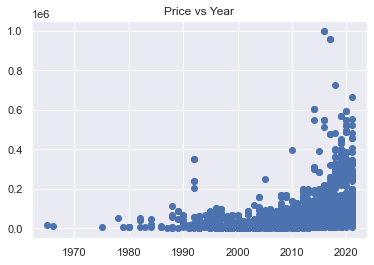

In [52]:
fig, ax = plt.subplots(1,1)
ax.scatter(X[:, 0], y)
plt.title("Price vs Year")

In [61]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_7969/3648555921.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1).set_precision(2)


,Year,Kms,Hp,Fuel_cons,Doors,Category_Convertible,Category_Coupe,Category_Minivan,Category_Sedan,Category_Small,Category_Suv,Category_Van,Category_Wagon,Gear_type_Automatic,Gear_type_Manual,Fuel_type_Compressed Natural Gas \(CNG\),Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Petrol,Brand_encoded,Model_encoded,Colour_encoded,Province_encoded,Price_EUR
Year,1.00,-0.63,0.02,-0.44,0.15,-0.07,-0.12,0.00,-0.08,0.01,0.16,0.00,0.08,0.17,-0.17,0.04,0.07,0.09,0.10,-0.12,-0.06,0.09,-0.00,0.04,0.19
Kms,-0.63,1.00,-0.12,0.13,0.04,-0.03,-0.03,0.08,0.11,-0.07,-0.10,0.01,0.07,-0.12,0.12,-0.02,0.26,-0.11,-0.06,-0.22,-0.09,-0.19,-0.08,-0.07,-0.28
Hp,0.02,-0.12,1.00,0.64,-0.44,0.09,0.45,-0.16,0.02,-0.27,-0.06,-0.02,-0.05,0.45,-0.45,-0.04,-0.21,-0.01,0.03,0.21,0.69,0.76,0.11,0.16,0.73
Fuel_cons,-0.44,0.13,0.64,1.00,-0.40,0.11,0.38,-0.08,-0.03,-0.20,-0.02,0.02,-0.15,0.14,-0.14,0.00,-0.39,-0.25,-0.13,0.49,0.53,0.45,0.09,0.08,0.39
Doors,0.15,0.04,-0.44,-0.40,1.00,-0.49,-0.80,0.23,0.21,0.28,0.27,-0.09,0.21,-0.23,0.23,0.04,0.20,0.02,0.06,-0.23,-0.34,-0.33,-0.04,-0.06,-0.30
Category_Convertible,-0.07,-0.03,0.09,0.11,-0.49,1.00,-0.13,-0.11,-0.10,-0.14,-0.13,-0.01,-0.10,0.06,-0.06,-0.02,-0.14,0.04,-0.05,0.16,0.08,0.09,-0.02,0.03,0.09
Category_Coupe,-0.12,-0.03,0.45,0.38,-0.80,-0.13,1.00,-0.18,-0.17,-0.22,-0.22,-0.02,-0.17,0.22,-0.22,-0.03,-0.14,-0.05,-0.03,0.17,0.33,0.32,0.06,0.05,0.28
Category_Minivan,0.00,0.08,-0.16,-0.08,0.23,-0.11,-0.18,1.00,-0.15,-0.20,-0.19,-0.02,-0.15,-0.12,0.12,0.01,0.14,0.00,-0.04,-0.13,-0.12,-0.10,-0.06,-0.02,-0.09
Category_Sedan,-0.08,0.11,0.02,-0.03,0.21,-0.10,-0.17,-0.15,1.00,-0.18,-0.18,-0.02,-0.13,0.06,-0.06,-0.02,0.09,-0.01,0.00,-0.09,-0.02,-0.06,-0.04,-0.01,-0.05
Category_Small,0.01,-0.07,-0.27,-0.20,0.28,-0.14,-0.22,-0.20,-0.18,1.00,-0.23,-0.02,-0.18,-0.20,0.20,0.08,-0.13,0.07,0.02,0.10,-0.14,-0.15,0.07,-0.04,-0.14


In [65]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .2)

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_train, y_train)

LinearRegression()

In [71]:
lr.coef_

array([ 4.35023213e+02, -5.39551737e-02,  7.06729353e+01, -3.28862998e+02,
       -1.67367201e+02,  1.89239687e+03, -2.92926050e+03,  1.08433723e+03,
       -1.34303473e+02,  4.64269551e+02, -1.15755926e+03,  1.12054723e+03,
       -3.40427654e+02, -7.81477401e+02,  7.81477401e+02, -9.72775683e+01,
        8.51570954e+02, -7.77260046e+02,  2.49118140e+02, -2.26151480e+02,
        7.26614891e-02,  8.06868742e-01,  1.39910882e-01,  7.04004714e-02])

In [73]:
y_pred = lr.predict(X_test)

In [75]:
y_pred[:10]

array([10583.84394381, 18557.38727486,  1377.70467727, 13603.11281704,
        7304.56435735, 25040.82105212, 10621.79417427, 17341.64976279,
        2647.6750962 , 19032.0815102 ])

In [76]:
y_test

array([ 7700, 10990,  4500, ...,  9990, 32999,  2250])

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        1.200e+01, 1.370e+02, 3.742e+03, 6.500e+01, 1.600e+01, 1.000e+01,
        3.000e+00, 1.000e+00]),
 array([-417022.79868779, -388002.20793686, -358981.61718593,
        -329961.026435  , -300940.43568407, -271919.84493313,
        -242899.2541822 , -213878.66343127, -184858.07268034,
        -155837.4819294 , -126816.89117847,  -97796.30042754,
         -68775.70967661,  -39755.11892567,  -10734.52817474,
          18286.06257619,   47306.65332712,   76327.24407806,
         105347.83482899,  134368.42557992,  163389.01633085]),
 <BarContainer object of 20 artists>)

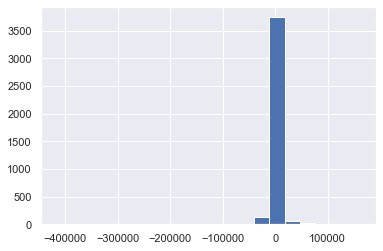

In [77]:
fig, ax = plt.subplots(1,1)
ax.hist(y_pred - y_test, bins=20)

In [78]:
lr.score(X_test, y_test)

0.8446479108107564